In [5]:
import numpy as np

a = np.load('elf.npy')
a_ztest = np.array([a[i] if i<245 else 0 for i in range(len(a))])

In [6]:
np.save('elf_ztest.npy', a_ztest)

<IPython.core.display.Javascript object>


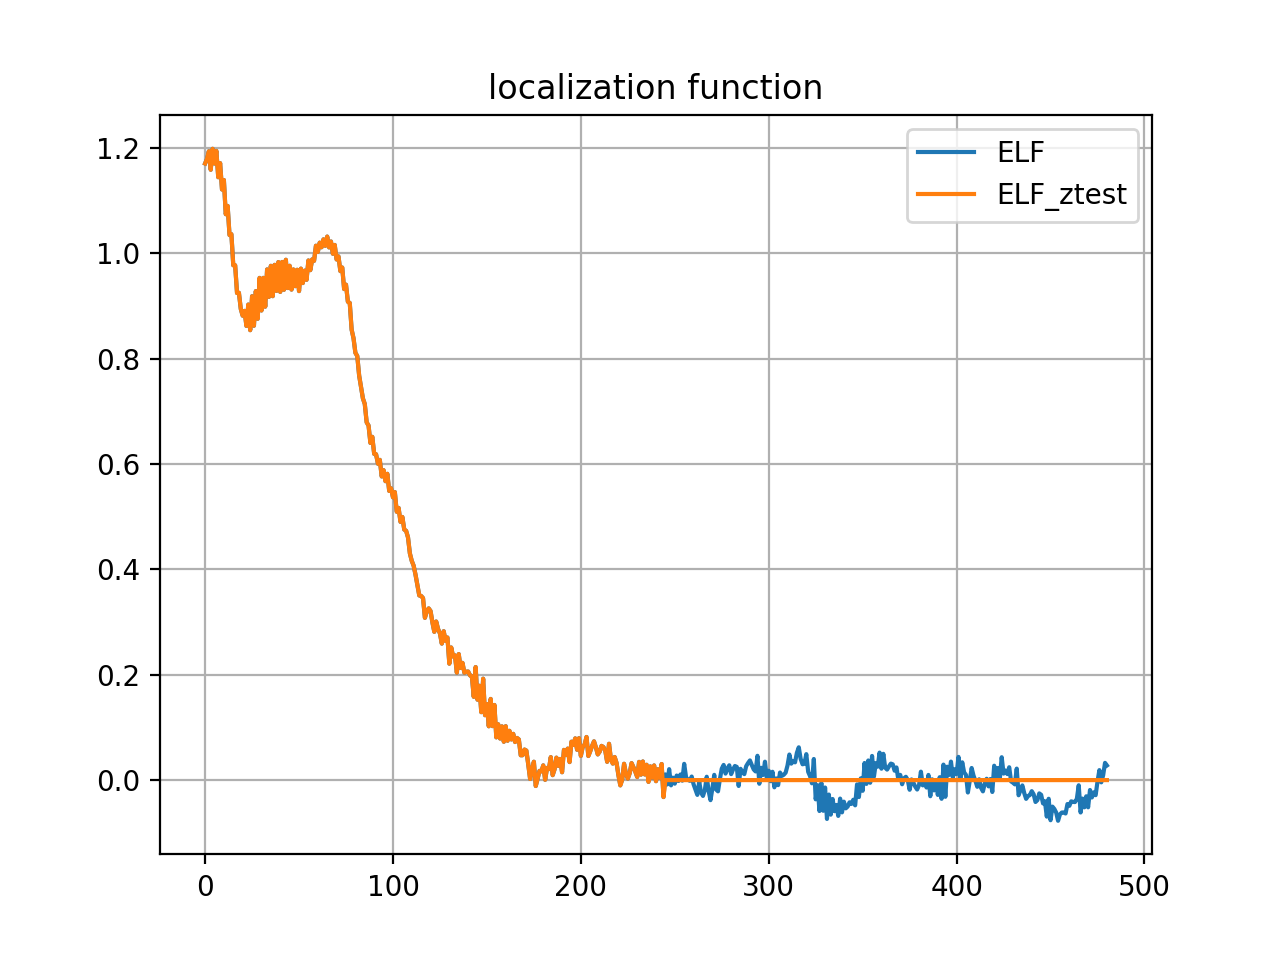

In [7]:
%matplotlib notebook
import sys
sys.path.append('/git_repo/general')
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
loc_size = int(model_size/2)+1


elf = np.load('elf.npy')
elf_ztest = np.load('elf_ztest.npy')

plt.plot(range(loc_size), elf, label='ELF')
plt.plot(range(loc_size), elf_ztest, label='ELF_ztest')
plt.title('localization function')
plt.legend()
plt.grid(True)
plt.show()

## smoothing splines

<IPython.core.display.Javascript object>


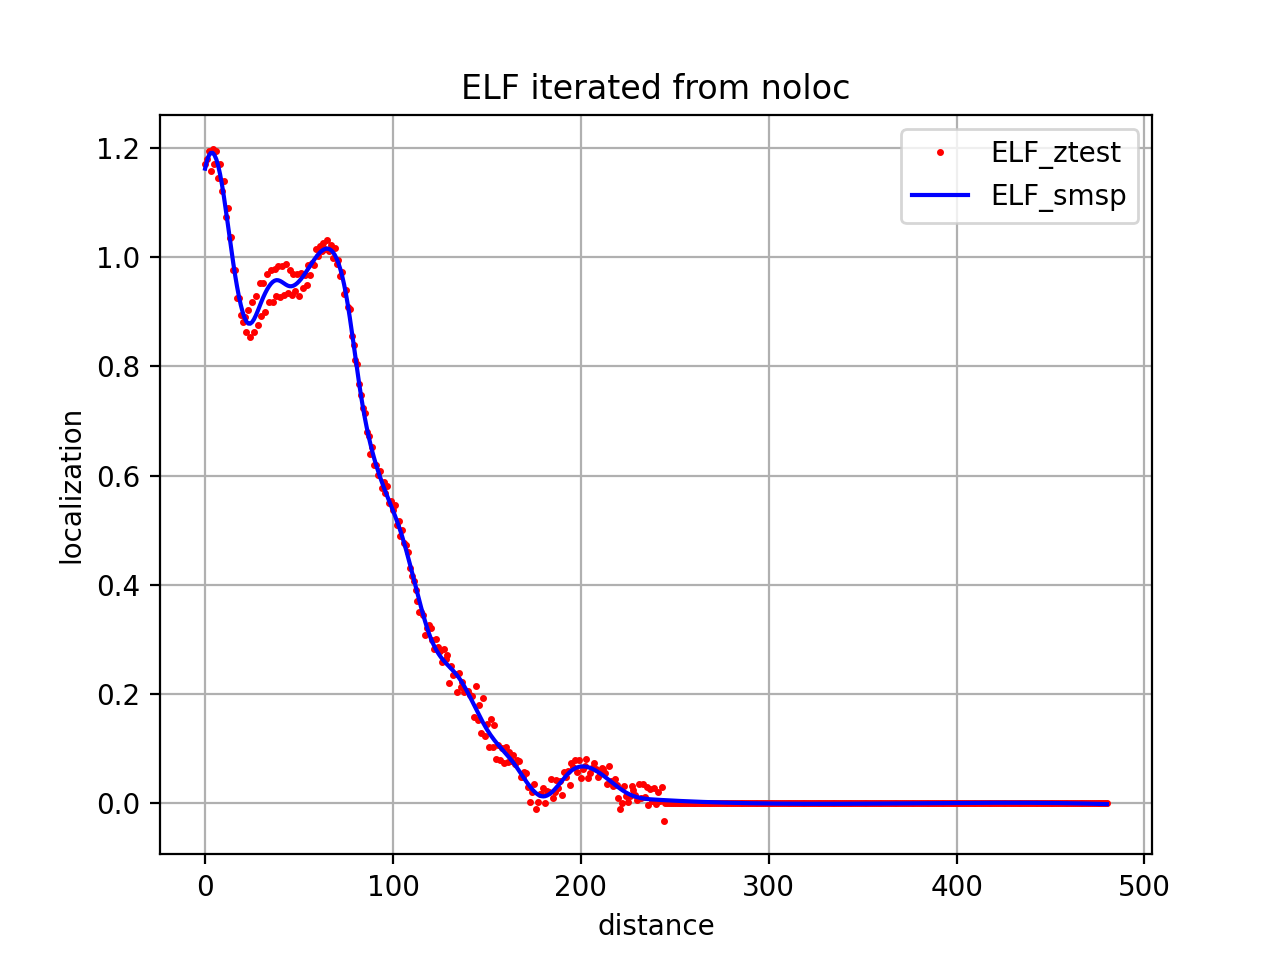

In [8]:
%matplotlib notebook
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt


elf_ztest = np.load('elf_ztest.npy')

loc_size=481
fitrange = 481
x = np.array(range(fitrange))
y = elf_ztest[:fitrange]

spl = UnivariateSpline(x, y,s=0.07)
y_smsp = spl(x)

elf_smsp = np.concatenate((y_smsp, elf_ztest[fitrange:]),axis=0)
xs = np.array(range(loc_size))
plt.plot(xs, elf_ztest, 'ro', ms=1.5, label='ELF_ztest')
plt.plot(xs, elf_smsp, 'b', lw=1.5, label='ELF_smsp')
plt.grid(True)
plt.title('ELF iterated from noloc')
plt.legend()
plt.xlabel('distance')
plt.ylabel('localization')
plt.show()
plt.savefig('elf_smsp.png')

In [10]:
np.save('elf_smsp.npy', elf_smsp)